# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("previsao_de_renda.csv")
df['mau'] = df['mau'].astype(int)
#df['mau'] = df['mau'].map({'False': 1, 'True': 0})
df

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,0,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,0,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,0,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,0,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,0,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,0,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,0,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,0,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,0,6975.39


In [77]:
df_filtrado = df[["mau","qtd_filhos","idade","tempo_emprego","qt_pessoas_residencia","renda"]]
df_filtrado.corr()

,mau,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
mau,1.000000,0.009544,-0.011087,-0.047722,-0.001555,-0.011577
qtd_filhos,0.009544,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.011087,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.047722,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,-0.001555,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,-0.011577,0.009567,0.042570,0.394235,0.020977,1.000000


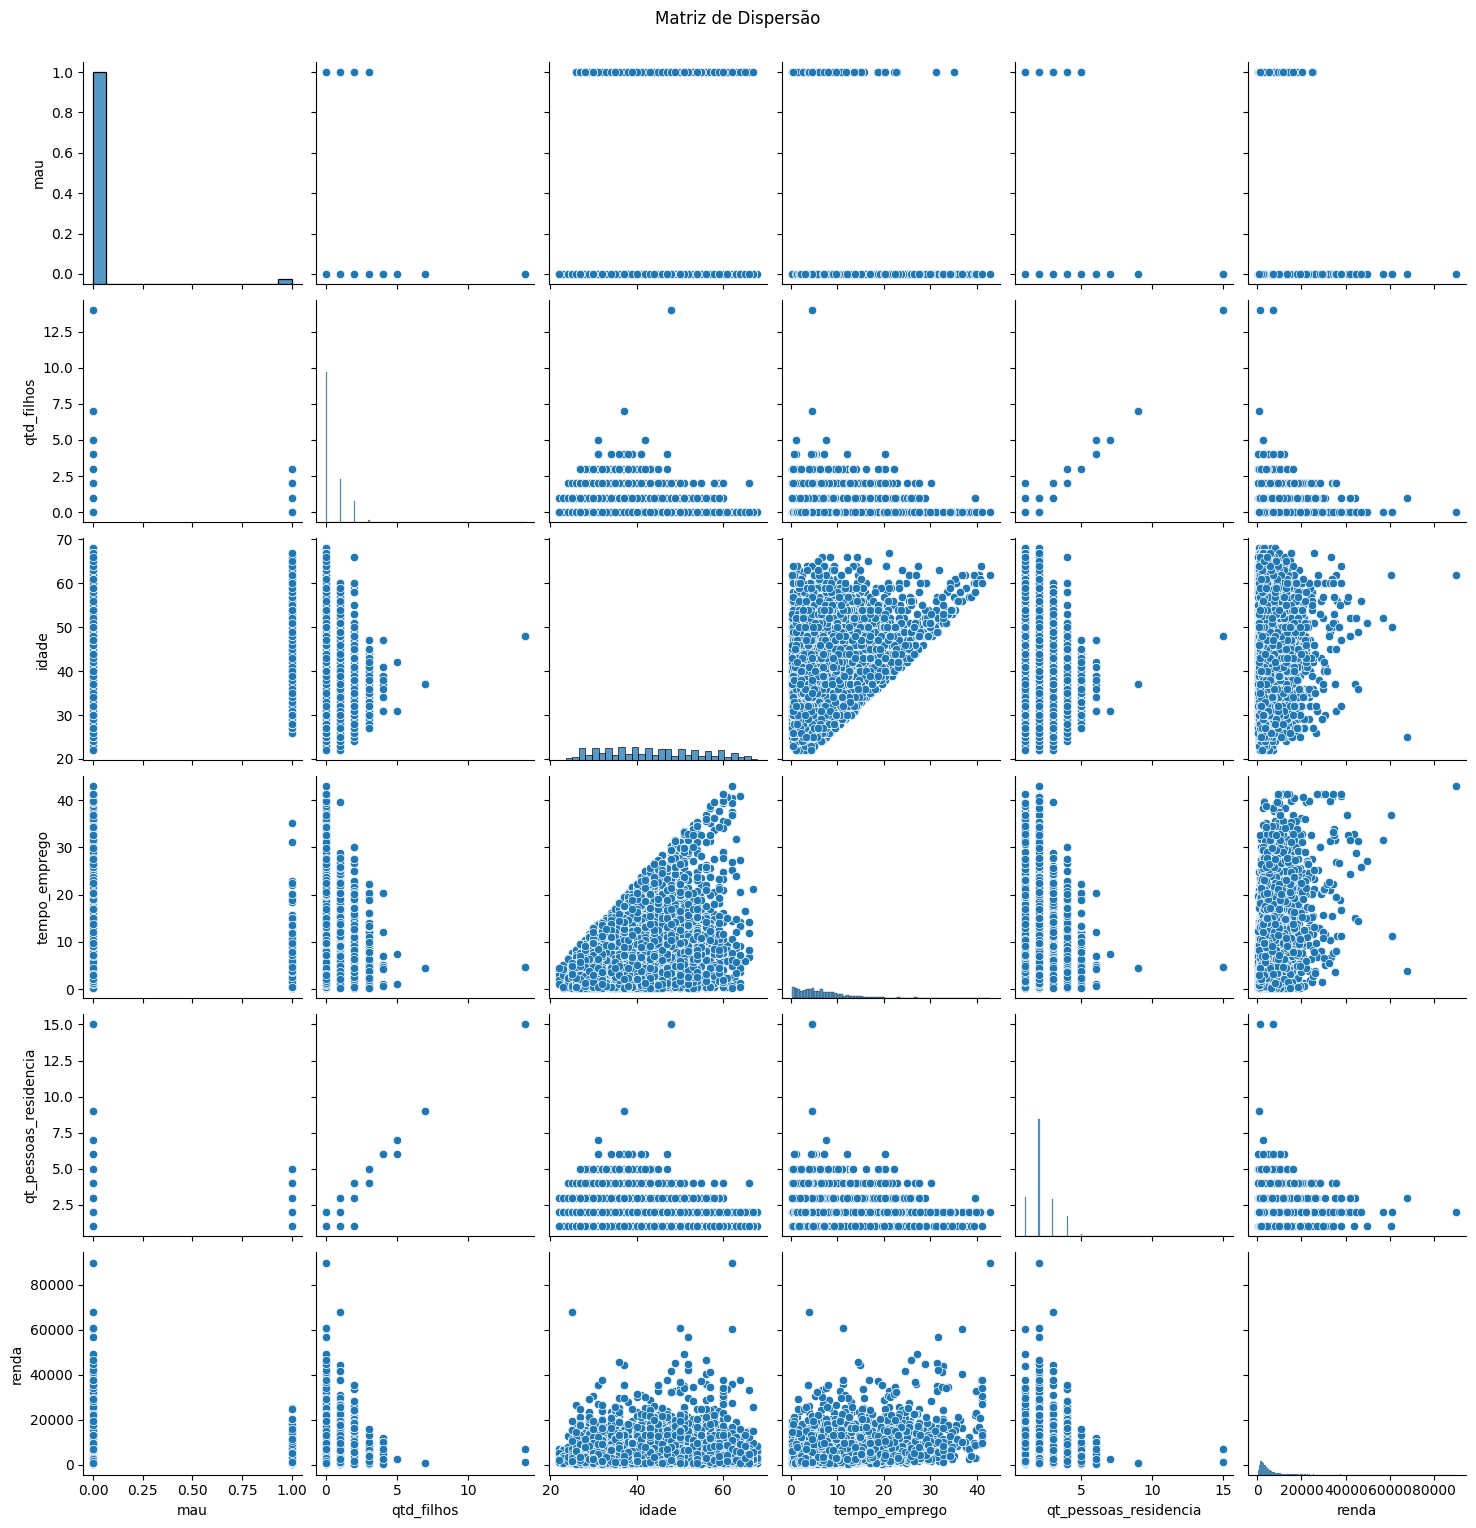

<Figure size 800x600 with 0 Axes>

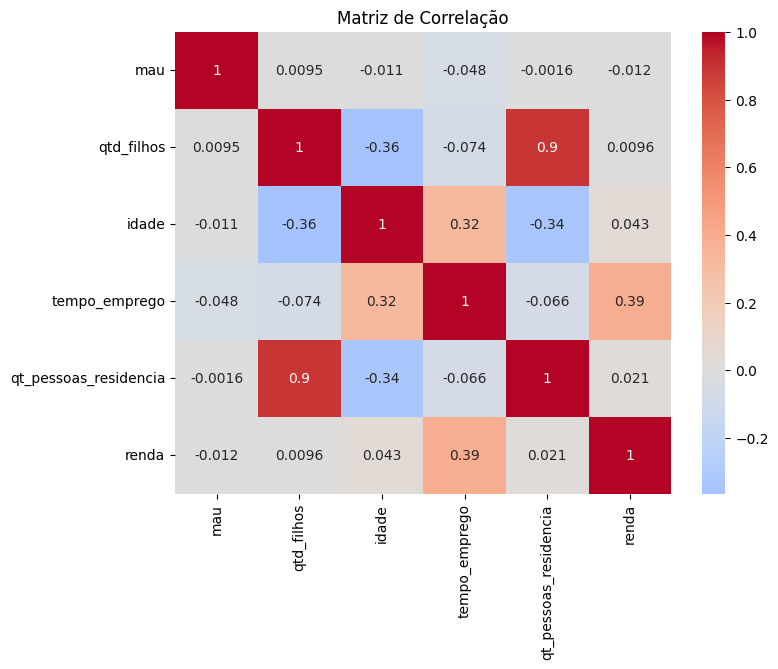

In [78]:
# Criando a Matriz de Dispersão
pairplot = sns.pairplot(df_filtrado)
pairplot.fig.suptitle('Matriz de Dispersão', y=1.02)
plt.figure(figsize=(8, 6))

# Calculando a Matriz de Correlação
correlation_matrix = df_filtrado.corr()

# Criando o Heatmap da Matriz de Correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação')
plt.show()

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

As duas variáveis mais correlacionadas com 'renda' são: Index(['tempo_emprego', 'idade'], dtype='object')


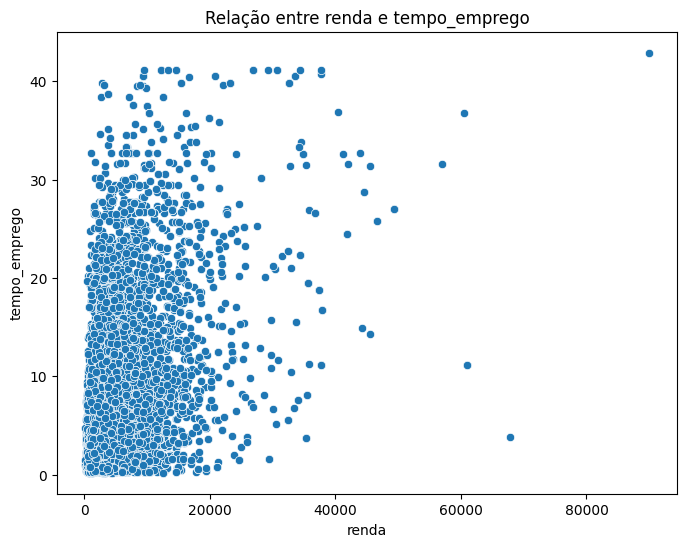

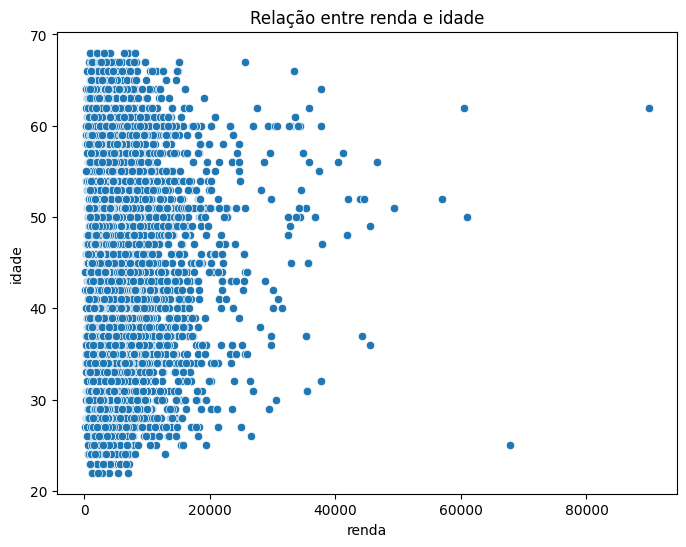

In [79]:
# Identificando as duas variáveis mais correlacionadas com 'renda'
correlations = correlation_matrix['renda'].drop('renda')  # Remove a própria 'renda' da lista
top_two = correlations.abs().nlargest(2).index  # Obtendo as duas variáveis com maior correlação
# Verificando as variáveis mais correlacionadas
print(f"As duas variáveis mais correlacionadas com 'renda' são: {top_two}")
for var in top_two:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df['renda'], y=df[var])
    plt.title(f'Relação entre renda e {var}')
    plt.xlabel('renda')
    plt.ylabel(var)
    plt.show()

3) Na sua opinião, há outliers na variável renda?

sim

4) Calcule o logaritmo da variável renda e repita a sequência de análise

As duas variáveis mais correlacionadas com 'log_renda' são: Index(['tempo_emprego', 'qt_pessoas_residencia'], dtype='object')


C:\Users\andre\AppData\Local\Temp\ipykernel_24732\2357796232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado.loc[:, 'log_renda'] = np.log(df_filtrado['renda'])


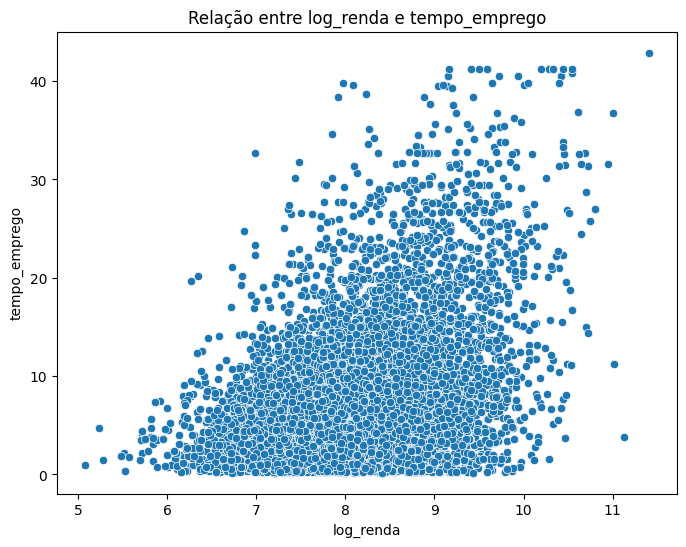

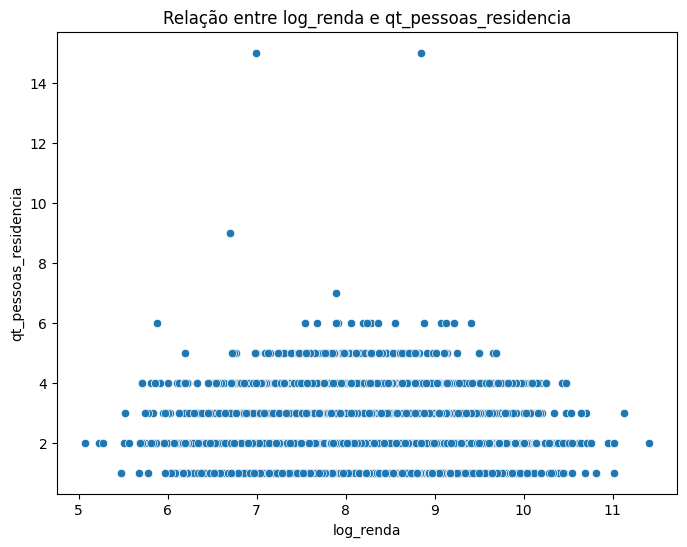

In [82]:
# Calculando o logaritmo da variável 'renda'
df_filtrado.loc[:, 'log_renda'] = np.log(df_filtrado['renda'])

# Calculando a Matriz de Correlação
correlation_matrix = df_filtrado.corr()

# Identificando as duas variáveis mais correlacionadas com 'log_renda'
correlations = correlation_matrix['log_renda'].drop(['log_renda','renda'])  # Remove a própria 'log_renda' da lista
top_two = correlations.abs().nlargest(2).index  # Obtendo as duas variáveis com maior correlação

# Verificando as variáveis mais correlacionadas
print(f"As duas variáveis mais correlacionadas com 'log_renda' são: {top_two}")

# Criando gráficos de dispersão para as duas variáveis mais correlacionadas com 'log_renda'
for var in top_two:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df_filtrado['log_renda'], y=df_filtrado[var])
    plt.title(f'Relação entre log_renda e {var}')
    plt.xlabel('log_renda')
    plt.ylabel(var)
    plt.show()

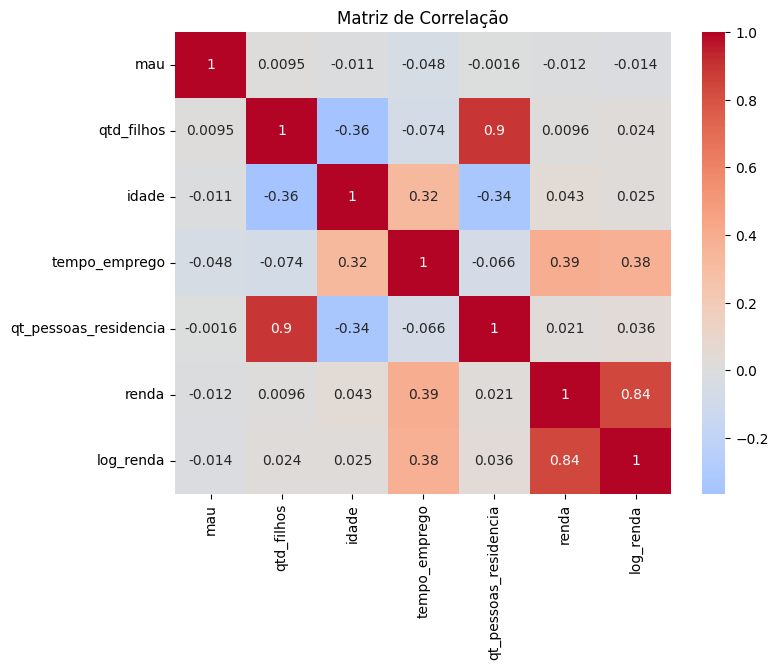

In [83]:
# Matriz de Correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação')
plt.show()

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Melhorou  facilitando a leitura